# micrograd from scratch

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## What is a Derivative? (Layman's Explanation)

Think of a derivative as the **rate of change** or **slope** of a function at any given point. Here's an intuitive way to understand it:

### Real-world Analogy: Driving a Car
- **Position**: Where your car is on the road (like the function value)
- **Velocity**: How fast you're moving (this is like the derivative!)
- **Acceleration**: How your velocity changes (this would be the derivative of velocity)

### Mathematical Intuition
If you have a function `f(x)` that represents something changing:
- The **derivative** tells you "how steep is the curve at this exact point?"
- A **positive derivative** = the function is going up (increasing)
- A **negative derivative** = the function is going down (decreasing) 
- A **zero derivative** = the function is flat at that point (neither increasing nor decreasing)

### Why Do We Care in Machine Learning?
In neural networks, we use derivatives to:
1. **Find the steepest direction** to minimize our error (loss function)
2. **Update our model parameters** to make better predictions
3. **Backpropagate** errors through the network to train it

The derivative essentially answers: *"If I nudge this input slightly, how much will my output change?"*

This is the foundation of **gradient descent** - the algorithm that trains neural networks!

In [11]:
def f(x):
    return 3*x**2 - 4*x + 5

In [12]:
f(3)

20

# Plotting a range from -5 to 5

In [13]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [14]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

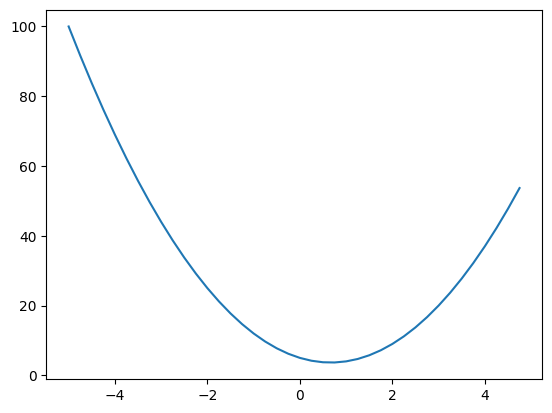

In [15]:
plt.plot(xs, ys)

## How to Calculate the Derivative of f(x) = 3x² - 4x + 5

### Step-by-Step Derivative Calculation

The derivative of a function tells us the **rate of change** at any point. For our function `f(x) = 3x² - 4x + 5`, we calculate it term by term:

#### Power Rule
For any term `ax^n`, the derivative is `n·a·x^(n-1)`

**Term 1: `3x²`**
- Coefficient: 3
- Power: 2
- Derivative: `2 × 3 × x^(2-1) = 6x`

**Term 2: `-4x`**
- Coefficient: -4
- Power: 1
- Derivative: `1 × (-4) × x^(1-1) = -4x^0 = -4`

**Term 3: `5`** (constant)
- Constants have a derivative of 0 (they don't change!)
- Derivative: `0`

#### Final Result
**f'(x) = 6x - 4**

### What This Means
- At any point x, the slope of our parabola is `6x - 4`
- When x = 0: slope = -4 (decreasing)
- When x = 1: slope = 2 (increasing)
- When x = 2/3: slope = 0 (flat point - this is the minimum!)

Let's verify this with code:

## Understanding What f'(x) = 6x - 4 Actually Means

⚠️ **Common Misconception Alert!** ⚠️

The derivative **f'(x) = 6x - 4** tells us the **instantaneous rate of change** (slope) at point x, but it doesn't directly tell us the change in y for a unit step.

### What f'(0) = -4 Actually Means:
- At x = 0, the slope is -4
- This means for a **tiny** change in x (like 0.001), y changes by approximately -4 × 0.001 = -0.004
- The derivative gives us the **rate** of change, not the total change over large intervals

### Let's Test Your Example:
At x = 0: f'(0) = 6(0) - 4 = -4

**Your prediction:** going from x=0 to x=1, y should decrease by 4
**Reality:** Let's calculate the actual change:
- f(0) = 3(0)² - 4(0) + 5 = 5
- f(1) = 3(1)² - 4(1) + 5 = 4
- **Actual change:** 4 - 5 = -1 (not -4!)

### Why the Difference?
The derivative changes as we move along the curve! 
- At x = 0: slope = -4
- At x = 0.5: slope = 6(0.5) - 4 = -1  
- At x = 1: slope = 6(1) - 4 = 2

The function curves from decreasing steeply to increasing, so the average change is different from the instantaneous slope at any single point.

In [16]:
# Let's verify the actual vs predicted changes
def f_prime(x):
    return 6*x - 4

print("Testing your understanding:")
print("="*50)

# Test case 1: x=0 to x=1
x1, x2 = 0, 1
actual_change = f(x2) - f(x1)
slope_at_start = f_prime(x1)
print(f"From x={x1} to x={x2}:")
print(f"  f({x1}) = {f(x1)}")
print(f"  f({x2}) = {f(x2)}")
print(f"  Actual change: {actual_change}")
print(f"  Slope at x={x1}: {slope_at_start}")
print(f"  Predicted change (if slope was constant): {slope_at_start * (x2-x1)}")
print()

# Test case 2: x=0 to x=-1  
x1, x2 = 0, -1
actual_change = f(x2) - f(x1)
slope_at_start = f_prime(x1)
print(f"From x={x1} to x={x2}:")
print(f"  f({x1}) = {f(x1)}")
print(f"  f({x2}) = {f(x2)}")
print(f"  Actual change: {actual_change}")
print(f"  Slope at x={x1}: {slope_at_start}")
print(f"  Predicted change (if slope was constant): {slope_at_start * (x2-x1)}")
print()

print("Key insight: The derivative gives instantaneous rate of change,")
print("but over larger intervals, the rate itself changes!")

Testing your understanding:
From x=0 to x=1:
  f(0) = 5
  f(1) = 4
  Actual change: -1
  Slope at x=0: -4
  Predicted change (if slope was constant): -4

From x=0 to x=-1:
  f(0) = 5
  f(-1) = 12
  Actual change: 7
  Slope at x=0: -4
  Predicted change (if slope was constant): 4

Key insight: The derivative gives instantaneous rate of change,
but over larger intervals, the rate itself changes!


## 🎯 Perfect Understanding!

**YES! The derivative is simply the slope at an exact point on a curve when plotted.**

That's it! Nothing more complicated than that. 

### Visual Intuition:
- Imagine you're drawing a **tangent line** (a line that just touches the curve at one point)
- The **slope of that tangent line** = the derivative at that point
- If the tangent line goes up steeply → large positive derivative
- If the tangent line goes down steeply → large negative derivative  
- If the tangent line is flat → derivative = 0

### Numerical Approximation:
The code below shows how we can approximate this slope by looking at tiny changes around a point:

In [17]:
h = 0.00000001
x = 3.0
(f(x + h) - f(x)) / h

14.00000009255109

In [18]:
h = 0.00000001
x = -3.0
(f(x + h) - f(x)) / h

-22.00000039920269

In [19]:
# Let's verify our analytical derivative matches the numerical approximation
print("Comparing analytical vs numerical derivatives:")
print("=" * 50)

test_points = [3.0, -3.0, 0.0, 2/3]
h = 0.00000001

for x in test_points:
    # Numerical approximation (what you computed above)
    numerical_derivative = (f(x + h) - f(x)) / h
    
    # Analytical derivative (our formula)
    analytical_derivative = 6*x - 4
    
    print(f"At x = {x}:")
    print(f"  Numerical (slope approximation): {numerical_derivative:.6f}")
    print(f"  Analytical (our formula f'(x)): {analytical_derivative:.6f}")
    print(f"  Difference: {abs(numerical_derivative - analytical_derivative):.10f}")
    print()

print("🎯 They match! This confirms that f'(x) = 6x - 4 gives us")
print("   the exact slope at any point on our parabola!")

Comparing analytical vs numerical derivatives:
At x = 3.0:
  Numerical (slope approximation): 14.000000
  Analytical (our formula f'(x)): 14.000000
  Difference: 0.0000000926

At x = -3.0:
  Numerical (slope approximation): -22.000000
  Analytical (our formula f'(x)): -22.000000
  Difference: 0.0000003992

At x = 0.0:
  Numerical (slope approximation): -4.000000
  Analytical (our formula f'(x)): -4.000000
  Difference: 0.0000000243

At x = 0.6666666666666666:
  Numerical (slope approximation): 0.000000
  Analytical (our formula f'(x)): 0.000000
  Difference: 0.0000000000

🎯 They match! This confirms that f'(x) = 6x - 4 gives us
   the exact slope at any point on our parabola!


In [20]:
### more complex, changing a
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [21]:
### more complex, changing b
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [22]:
### more complex, changing c
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


Creating the Value class for Neural Networks

## Understanding `_children` and `_prev` in the Value Class

### What is `_children`?
`_children` is **NOT a native Python feature** - it's a custom parameter we're adding to track the computational graph!

```python
def __init__(self, data, _children=()):
    self.data = data           # The actual number (2.0, -3.0, etc.)
    self._prev = set(_children) # Set of Values that created this Value
```

### Why Do We Need This?
In neural networks, we need to track **how each value was created** so we can compute gradients through backpropagation.

### Example Walkthrough:
```python
a = Value(2.0)     # _children=() → _prev=set() (no parents)
b = Value(-3.0)    # _children=() → _prev=set() (no parents)  
c = Value(10.0)    # _children=() → _prev=set() (no parents)

# When we do operations:
d = a * b          # _children=(a, b) → _prev={a, b}
e = d + c          # _children=(d, c) → _prev={d, c}
```

### The Computational Graph:
```
a (2.0) ────┐
            ├─→ d (a*b) ────┐
b (-3.0) ───┘              ├─→ e (d+c)
                           │
c (10.0) ──────────────────┘
```

### Why `_prev` instead of `_children`?
- **`_children`**: What we pass in (the inputs that created this value)
- **`_prev`**: What we store (the "previous" nodes in the graph)
- We convert to a `set()` to avoid duplicates and for efficient lookups

This graph structure lets us trace backwards through all operations to compute gradients!

In [25]:
class Value:

    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other))
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other))

In [26]:
# Let's trace through the computational graph step by step
print("Building the computational graph:")
print("=" * 40)

# Create leaf nodes (no parents)
a = Value(2.0)
b = Value(-3.0) 
c = Value(10.0)

print(f"a = {a}, _prev = {a._prev}")
print(f"b = {b}, _prev = {b._prev}")
print(f"c = {c}, _prev = {c._prev}")
print()

# First operation: a * b
d = a * b
print(f"d = a * b = {d}")
print(f"d._prev = {d._prev}")
print(f"d knows it came from: {[str(node) for node in d._prev]}")
print()

# Second operation: d + c  
e = d + c
print(f"e = d + c = {e}")
print(f"e._prev = {e._prev}")
print(f"e knows it came from: {[str(node) for node in e._prev]}")
print()

print("🎯 This creates a graph where each Value knows its 'parents'")
print("   Later, we'll use this to compute gradients via backpropagation!")

Building the computational graph:
a = Value(data=2.0), _prev = set()
b = Value(data=-3.0), _prev = set()
c = Value(data=10.0), _prev = set()

d = a * b = Value(data=-6.0)
d._prev = {Value(data=-3.0), Value(data=2.0)}
d knows it came from: ['Value(data=-3.0)', 'Value(data=2.0)']

e = d + c = Value(data=4.0)
e._prev = {Value(data=10.0), Value(data=-6.0)}
e knows it came from: ['Value(data=10.0)', 'Value(data=-6.0)']

🎯 This creates a graph where each Value knows its 'parents'
   Later, we'll use this to compute gradients via backpropagation!


In [27]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c

d._prev

{Value(data=-6.0), Value(data=10.0)}

## ⚠️ Small Correction Needed!

Let me clarify what's actually happening:

```python
a = Value(1)    # a is a Value object, not just the number 1
b = Value(2)    # b is a Value object, not just the number 2
c = a * b       # c is a new Value object
```

### What Actually Happens:
- **c.data** = 2 (the result of 1 * 2)
- **c._prev** = {Value(1), Value(2)} (the actual Value objects, not just numbers)
- **a._prev** = set() (empty - 'a' wasn't created from other Values)

### The Key Point:
- `_prev` stores **Value objects**, not just numbers
- Only the **result** (c) has the inputs in its `_prev`
- The **inputs** (a, b) have empty `_prev` since they're leaf nodes

Let's demonstrate this clearly:

In [28]:
# Let's test your understanding with a clear example
print("Creating Value objects:")
a = Value(1)
b = Value(2)
print(f"a = {a}")
print(f"b = {b}")
print(f"a._prev = {a._prev}")
print(f"b._prev = {b._prev}")
print()

print("Performing multiplication:")
c = a * b
print(f"c = a * b = {c}")
print(f"c.data = {c.data}")
print(f"c._prev = {c._prev}")
print()

print("Key insights:")
print("- c.data contains the RESULT (1 * 2 = 2)")
print("- c._prev contains the INPUT OBJECTS that created c")
print("- a._prev and b._prev are empty (they're leaf nodes)")
print(f"- c knows it came from: {[f'Value({node.data})' for node in c._prev]}")
print()

print("🎯 The graph tracks OBJECTS, not just numbers!")
print("   This lets us trace backwards through the computation!")

Creating Value objects:
a = Value(data=1)
b = Value(data=2)
a._prev = set()
b._prev = set()

Performing multiplication:
c = a * b = Value(data=2)
c.data = 2
c._prev = {Value(data=1), Value(data=2)}

Key insights:
- c.data contains the RESULT (1 * 2 = 2)
- c._prev contains the INPUT OBJECTS that created c
- a._prev and b._prev are empty (they're leaf nodes)
- c knows it came from: ['Value(1)', 'Value(2)']

🎯 The graph tracks OBJECTS, not just numbers!
   This lets us trace backwards through the computation!


# Back on track...

In [29]:
class Value:

    def __init__(self, data, _children=(), _operation='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._operation = _operation
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [30]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

print('d.data', d.data)
print('d._prev', d._prev)
print('d._operation', d._operation)
print('d.label', d.label)

d.data 4.0
d._prev {Value(data=-6.0), Value(data=10.0)}
d._operation +
d.label d


In [71]:
# pip install graphviz

### GraphViz

In [91]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
        if n._operation:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._operation, label = n._operation)
            # and connect this node to it
            dot.edge(uid + n._operation, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._operation)
    
    return dot

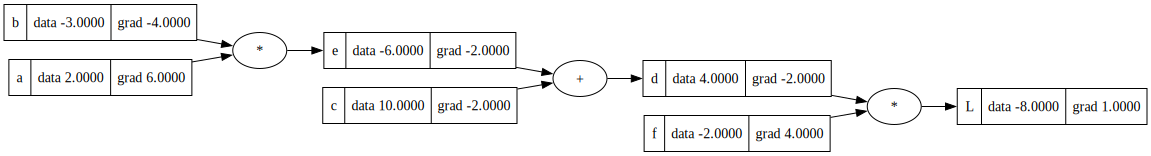

In [92]:
draw_dot(L)

## Manual Back Propagation

In [93]:
class Value:

    def __init__(self, data, _children=(), _operation='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._operation = _operation
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def tanh(self):
        x = self.data
        t = ((math.exp(2*x) - 1) / (math.exp(2*x) + 1))
        return Value(t, (self, ), 'tanh')


In [94]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

In [95]:
def grad_finder():

    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

grad_finder()

-4.000000000008441


Used `grad_finder()` to figure out how a small changes or wiggles in `a, b, c, d, e, f, and L` would impact `L`, the `gradient`.

In [96]:
L.grad = 1
f.grad = 4
d.grad = -2
c.grad = -2
e.grad = -2
a.grad = 6
b.grad = -4

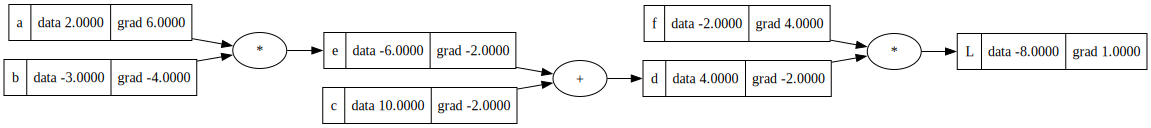

In [97]:
draw_dot(L)

### Manual Backpropagation Example 2

https://youtu.be/VMj-3S1tku0?si=MgwOkMFLPb43twZg&t=3182

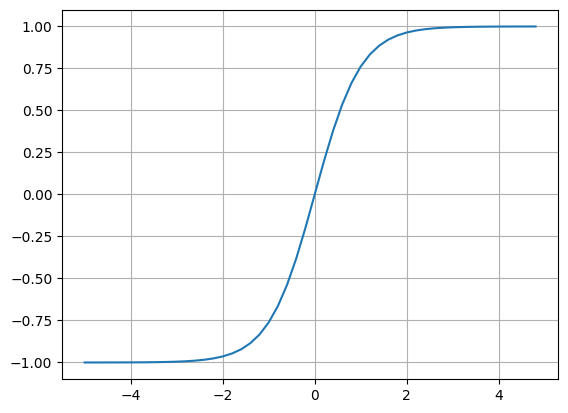

In [98]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

2d Neuron

In [99]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
bias = Value(6.8813735870195432, label='bias')

x1w1 = x1*w1; x1w1.label = 'x1•w1'
x2w2 = x2*w2; x2w2.label = 'x2•w2'

x1w1_times_x2w2 = x1w1 + x2w2; x1w1_times_x2w2.label = 'x1•w1 + x2•w2'

n = x1w1_times_x2w2 + bias; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [100]:
# Function to evaluate the neural network for any x1, x2 inputs
def neural_network(x1_val, x2_val, w1_val=-3.0, w2_val=1.0, bias_val=6.8813735870195432):
    """Compute the neural network output for given inputs"""
    x1 = Value(x1_val, label='x1')
    x2 = Value(x2_val, label='x2')
    w1 = Value(w1_val, label='w1')
    w2 = Value(w2_val, label='w2')
    bias = Value(bias_val, label='bias')
    
    x1w1 = x1 * w1
    x2w2 = x2 * w2
    x1w1_plus_x2w2 = x1w1 + x2w2
    n = x1w1_plus_x2w2 + bias
    o = n.tanh()
    
    return o.data

# Test with your example
result = neural_network(2.0, 0.0)
print(f"Neural network output for (x1=2, x2=0): {result:.4f}")
print(f"Original calculation: {o.data:.4f}")
print(f"Match: {abs(result - o.data) < 1e-10}")

Neural network output for (x1=2, x2=0): 0.7071
Original calculation: 0.7071
Match: True


Gradients

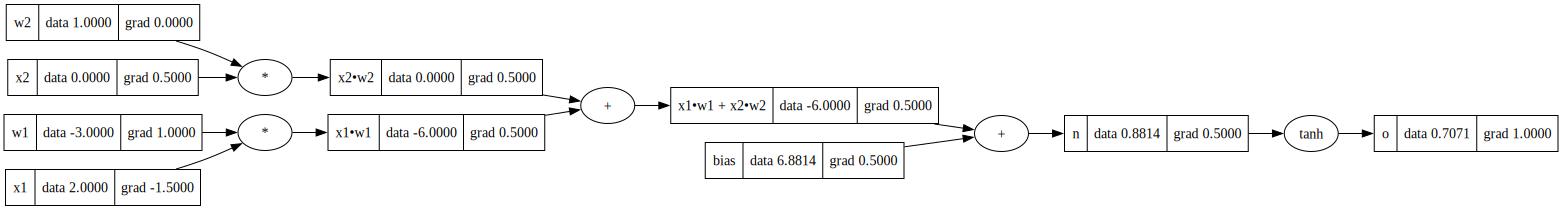

In [101]:
# inputs
x1.grad = -1.5
x2.grad = 0.5

# weights
w1.grad = 1
w2.grad = 0

x1w1.grad = 0.5
x2w2.grad = 0.5

x1w1_times_x2w2.grad = 0.5 # because of the tanh funciton up ahead

o.grad = 1
n.grad = 0.5 # 1 - (o.data**2), derivative of tanh, look it up

bias.grad = 0.5
draw_dot(o)

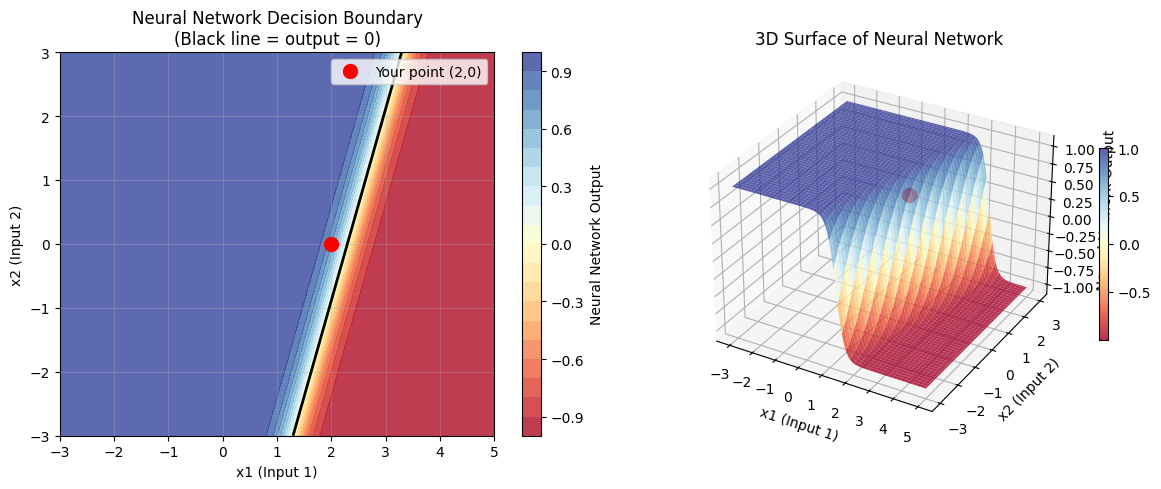

Your point (2, 0) has output: 0.7071
Red regions: Positive output (neuron 'fires')
Blue regions: Negative output (neuron doesn't fire)
Black line: Decision boundary (output = 0)


In [102]:
# Create a matplotlib visualization of the neural network decision boundary
import matplotlib.pyplot as plt

# Create a grid of x1, x2 values to evaluate the neural network
x1_range = np.linspace(-3, 5, 100)
x2_range = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Evaluate neural network for each point in the grid
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = neural_network(X1[i, j], X2[i, j])

# Create the plot
plt.figure(figsize=(12, 5))

# Left subplot: Decision boundary and regions
plt.subplot(1, 2, 1)
plt.contourf(X1, X2, Z, levels=20, cmap='RdYlBu', alpha=0.8)
plt.colorbar(label='Neural Network Output')
plt.contour(X1, X2, Z, levels=[0], colors='black', linewidths=2)
plt.plot(2.0, 0.0, 'ro', markersize=10, label='Your point (2,0)')
plt.xlabel('x1 (Input 1)')
plt.ylabel('x2 (Input 2)')
plt.title('Neural Network Decision Boundary\n(Black line = output = 0)')
plt.legend()
plt.grid(True, alpha=0.3)

# Right subplot: 3D surface
ax = plt.subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='RdYlBu', alpha=0.8)
ax.scatter([2.0], [0.0], [neural_network(2.0, 0.0)], color='red', s=100, label='Your point')
ax.set_xlabel('x1 (Input 1)')
ax.set_ylabel('x2 (Input 2)')
ax.set_zlabel('Neural Network Output')
ax.set_title('3D Surface of Neural Network')
plt.colorbar(surf, shrink=0.5)

plt.tight_layout()
plt.show()

print(f"Your point (2, 0) has output: {neural_network(2.0, 0.0):.4f}")
print("Red regions: Positive output (neuron 'fires')")
print("Blue regions: Negative output (neuron doesn't fire)")
print("Black line: Decision boundary (output = 0)")

# Doing the Backpropagation Programatically

In [103]:
# Value Class Reiterated

class Value:

    def __init__(self, data, _children=(), _operation='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._operation = _operation
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():        
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward

        return out 

    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = ((math.exp(2*x) - 1) / (math.exp(2*x) + 1))
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        
        return out


In [104]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
bias = Value(6.8813735870195432, label='bias')

x1w1 = x1*w1; x1w1.label = 'x1•w1'
x2w2 = x2*w2; x2w2.label = 'x2•w2'

x1w1_times_x2w2 = x1w1 + x2w2; x1w1_times_x2w2.label = 'x1•w1 + x2•w2'

n = x1w1_times_x2w2 + bias; n.label = 'n'
o = n.tanh(); o.label = 'o'

Calling backward manually

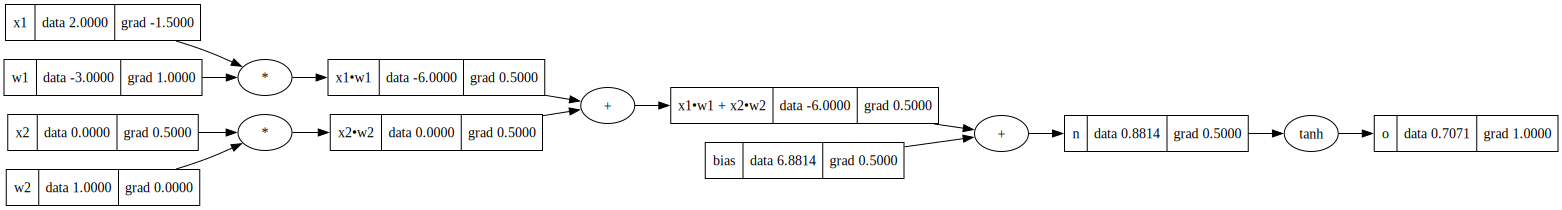

In [105]:
o.grad = 1.0
o._backward()
n._backward()
bias._backward()
x1w1_times_x2w2._backward()
x1w1._backward()
x2w2._backward()
w1._backward()
w2._backward()
x1._backward()
w2._backward()
draw_dot(o)

Calling `_backward()` programatically using topological sort, where recursively builds the node list in reverse.

In [106]:
topo = []
visited_nodes = set()

def build_topo(node):

    if node not in visited_nodes:
        visited_nodes.add(node)

        for child in node._prev:
            build_topo(child)
        topo.append(node)

build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

Doing it again as one block of code.

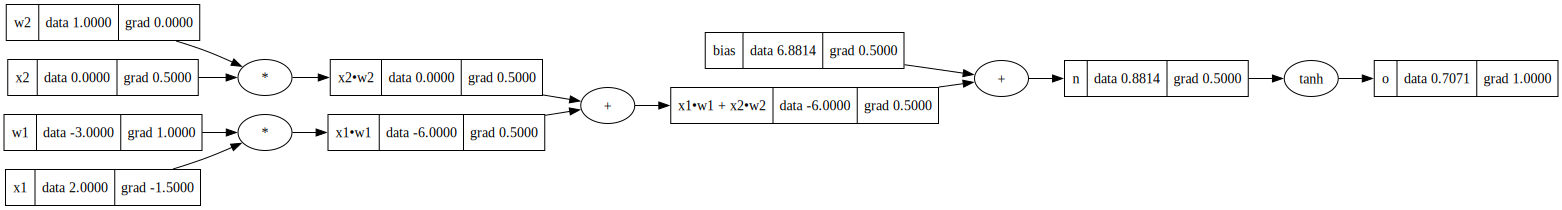

In [107]:
# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
bias = Value(6.8813735870195432, label='bias')

x1w1 = x1*w1; x1w1.label = 'x1•w1'
x2w2 = x2*w2; x2w2.label = 'x2•w2'

x1w1_times_x2w2 = x1w1 + x2w2; x1w1_times_x2w2.label = 'x1•w1 + x2•w2'

n = x1w1_times_x2w2 + bias; n.label = 'n'
o = n.tanh(); o.label = 'o'

topo = []
visited_nodes = set()

# Setting Gradients
o.grad = 1;

build_topo(o)

for node in reversed(topo):
    node._backward()

draw_dot(o)

# Refactored Code

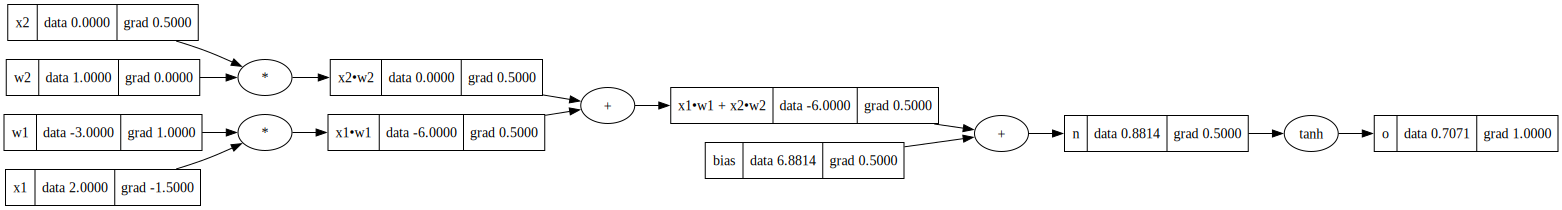

In [108]:
# Value Class
class Value:

    def __init__(self, data, _children=(), _operation='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._operation = _operation
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():        
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward

        return out 

    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = ((math.exp(2*x) - 1) / (math.exp(2*x) + 1))
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        
        return out
    
    def backward(self):

        topo = []
        visited_nodes = set()
        def build_topo(node):
            if node not in visited_nodes:
                visited_nodes.add(node)
                for child in node._prev:
                    build_topo(child)
                topo.append(node)
        build_topo(self)

        self.grad = 1

        for node in reversed(topo):
            node._backward()

# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
bias = Value(6.8813735870195432, label='bias')

# neural network
x1w1 = x1*w1; x1w1.label = 'x1•w1'
x2w2 = x2*w2; x2w2.label = 'x2•w2'
x1w1_times_x2w2 = x1w1 + x2w2; x1w1_times_x2w2.label = 'x1•w1 + x2•w2'
n = x1w1_times_x2w2 + bias; n.label = 'n'
o = n.tanh(); o.label = 'o'

# back propagation
o.backward()

draw_dot(o)

# 🐞 Bug Alert